Shown below is an empty cell. Code block can be written in this cell for execution.

shift + enter runs the output of a cell

In [ ]:
2 + 2

4

We can import python libraries that are installed and use them interactively on jupyter notebooks.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

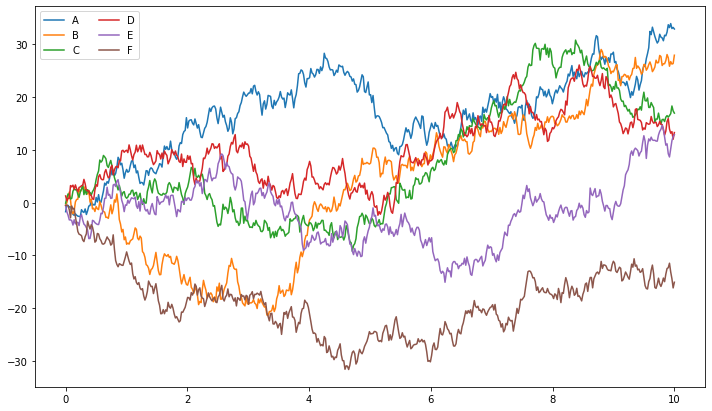

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

Interacting with data

In [ ]:
import requests
import pandas as pd

Data is imported from Cryptowatch.

In [ ]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [ ]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-25 16:48:26.976110')

In [ ]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [ ]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

### Bitcoin:

In [ ]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 17:00:00,18989,19121,18959,18959,65.627126,1.250276e+06
2022-09-25 18:00:00,18970,19028,18879,19003,26.922897,5.094888e+05
2022-09-25 19:00:00,19002,19014,18872,18940,34.465768,6.524662e+05
2022-09-25 20:00:00,18937,18992,18870,18917,39.709793,7.518788e+05
2022-09-25 21:00:00,18924,18954,18890,18908,30.975891,5.860475e+05


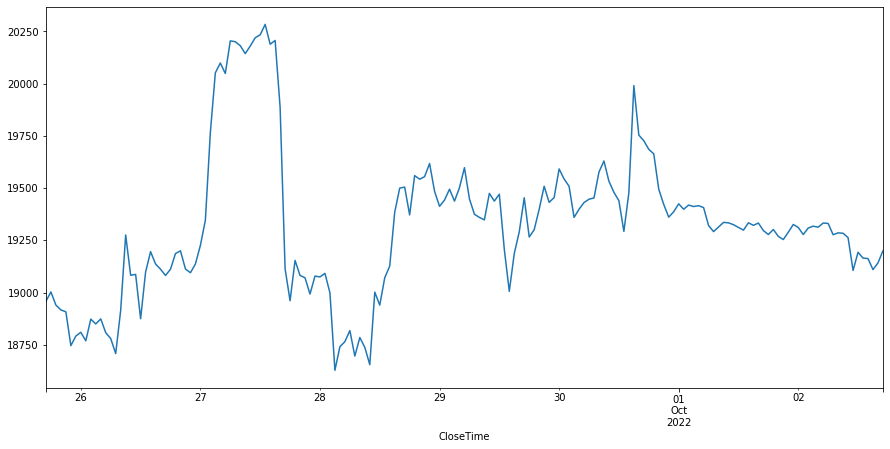

In [ ]:
btc['ClosePrice'].plot(figsize=(15, 7))

### Ether:

In [ ]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-25 17:00:00,1311.2,1320.8,1302.6,1302.6,469.631981,6.159941e+05
2022-09-25 18:00:00,1304.2,1304.2,1282.3,1296.9,577.646884,7.454594e+05
2022-09-25 19:00:00,1297.1,1300.4,1289.7,1297.2,405.799249,5.254950e+05
2022-09-25 20:00:00,1296.7,1303.4,1295.0,1300.0,475.893164,6.181069e+05
2022-09-25 21:00:00,1299.7,1299.9,1291.7,1292.9,1066.163968,1.381914e+06


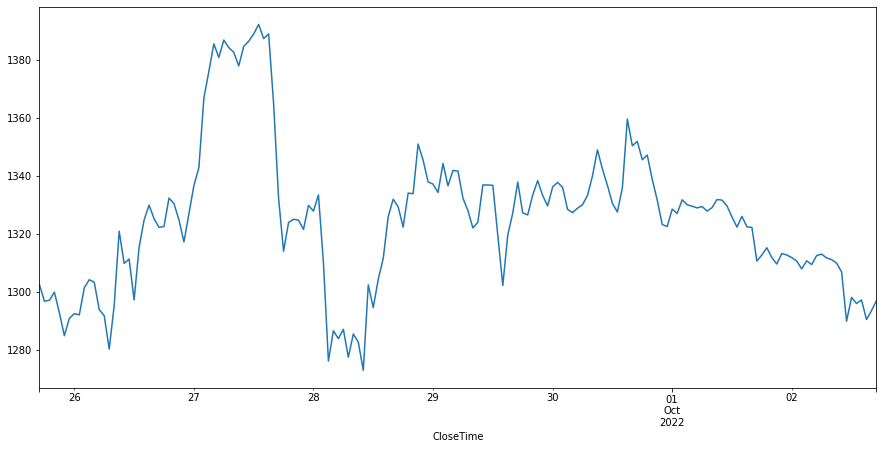

In [ ]:
eth['ClosePrice'].plot(figsize=(15, 7))

### Dynamic plots with Bokeh

We've also included Bokeh as part of this main distribution. Bokeh is a plotting library that generates interactive plots, that can be manipulated right within your browser.

We first need to import the libraries:

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [ ]:
output_notebook()

In [ ]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

Exporting to Excel. We can also store data in different file formats such as csv or excel format.

In [ ]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [ ]:
btc.to_excel(writer, sheet_name='Bitcoin')

In [ ]:
eth.to_excel(writer, sheet_name='Ether')


In [ ]:
writer.save()

In [ ]:
def add(x, y):
    return x + y


In [ ]:
add(2,3)

5